-----
# <center>Probabilistic Algorithms in Cryptography</center>

### Abstract

This Jupyter notebook discusses probabilistic algorithms and their applications in the field of cryptography. I start by reviewing basic terminology and some background and theory behind algorithms and cryptosystems. I then discuss various classifications of probabilistic algorithms. And finally, i implement a few probabilistic algorithms from various areas of cryptography. 

-----
# <center>Table of Contents</center> <a name="toc"></a>

1. [**Introduction**](#introduction)
  - Motivating the Need for Probabilistic Algorithms
  - What Makes a Problem Hard to Solve?
  - Shortcomings of Time Complexity Analysis
    - Is an algorithm that runs in polynomial time actually fast in practice?
    - Ramifications of P vs NP
 
2. [**Classification of Probabilistic Algorithms**](#section2)
  - Monte Carlo Algorithms
  - Markov Chains
  - Monte Carlo Methods / Experiments

3. [**Primality Testing**](#primality_testing)
  - Primality Tests
  - Code

4. [**Vigenère Cipher**](#vigenère_cipher)
  - Explanation
  - Code
  
5. [**Random Number Generation**](#png)
  - Pseudorandom Number Generators
  - True Random Number Generators
  - Code

-----
<a name="introduction"></a> 
# <center>Introduction</center> 

### Motivating the Need for Probabilistic Algorithms

###### Deterministic vs Stochastic Algorithms
A Deterministic algorithm is an algorithm that for any given input, always returns the same output. These types of algorithms are well defined, and are analogous to functions in mathematics, namely they satisfy "$x = y$ implies $f(x) = f(y)$". In computer science, determinism is essential in many contexts. In critical real time systems, its expected that computations occur with accuracy and in real time. In software controlling weapon systems or vehicles, unexpected results from a lack of determinism could easily result in catastrophic failure. We also want hardware level applications and operating systems to be deterministic as well, because its essential that they have consistent results and no errors. 

A Stochastic or Randomized Algorithm is not guaranteed to have the same output, given a single input. In other words, it is not deterministic. This property is obviously not desired in many contexts, because when we have the choice of a Deterministic vs Stochastic Algorithm, we would always choose the Deterministic one, assuming no other differences between the two. But that assumption in general is not the case, we choose stochastic over deterministic algorithms when the loss of certainty about consistently getting a "predetermined" result is a worthwhile sacrifice for improved time or space complexity. 

###### Complete vs Probabilistic Algorithms
A Complete Algorithm is an algorithm who's output is guaranteed to be correct, if the correct output exists. This is quite obviously a desirable property. Similar to the case of determinism, completeness of an algorithm is desired in many of the same contexts, in real time systems or hardware level applications and operating systems.

A Probabilistic Algorithm is an algorithm who's output is correct, only up to a given probability. A Probabilistic Algorithm is not Complete. Similar to the choice of Deterministic vs Stochastic, the choices made to choose a probabilistic algorithm over a complete algorithm is normally made when the former gives an improved time / space complexity.

###### Sacrificing for Improved Time / Space Complexity
In general, we can characterize  algorithms in terms of these two axis, deterministic-stochastic and complete-probabilistic. Deterministic and Complete is always the desired property, but if we have algorithms to solve some problem on the left and right end of the axises, the choice may come down to minimizing time complexity. But there are instances where we don't have a deterministic or complete algorithm to solve some problem, in which the choice of a stochastic or probabilistic algorithm is made out of necessity, because we have no better way of solving some problem. I will discuss an instance of this in the section on the Vigenere Cipher. 

<br>

### What Makes a Problem Hard to Solve?

###### Intractability
An intractable problem is a problem that is hard to solve. In the context of Cryptosystems, we need to build them around a problem that is intractable, hard to compute, if an adversary doesn't have some key piece of information. So being able to characterize the difficult required to solve a problem, more specifically how long it takes to solve, is an essential tool for cryptography. 

This issue of characterizing time complexity of some problem or algorithm is a shared issue between Cryptosystems and Probabilistic Algorithms. The P vs NP problem is a canonical issue of characterizing the time complexity of algorithms, so i discuss it here. 

###### What is P vs NP

The P vs NP problem attempts to answer the question, if a solution to a yes or no question can be verified in polynomial time, can the problem be solved in polynomial time?

To begin rigorously discussing this problem, theoretical computer science begins by defining two classes of decision problems (questions that can be framed as a yes or no question).

###### P
The Class P is the set of all decision problems that can be solved by a deterministic turing machine in $\mathcal O (x^n)$ time for some $n \in \mathbb R^+$. 

###### NP
The Class P is the set of all decision problems that can be solved by a non=deterministic turing machine in $\mathcal O (x^n)$ time for some $n \in \mathbb R^+$. 

<br>

### Shortcomings of Time Complexity Analysis

There are two reason i briefly introduced the P vs NP problem above. 1. I can highlight the misleading nature of the assumption that a algorithm the runs in polynomial time is fast in practice. 2. A proof to the question, "Does P equal NP?", won't necessarily have significant or immediate ramifications to the questions of time complexity introduced above. 

#### 1. Is an algorithm that runs in polynomial time actually fast in practice? 

###### Information Lost in Big $\mathcal O$ Notation 

The using of Big $\mathcal O$ notation, or the assertion of an algorithm that runs in polynomial time, brings in some of the problems that come with using Big $\mathcal O$ notation, namely the loss of important information of the exact time complexity of the algorithm. For example, $f(n) = \frac{n^{15}}{10^{100}}$, and $g(n) = 10^{10} \cdot  n$ are both polynomials. But if we we only have $10^{10}$ units of time to run the algorithm, the largest $n$ that we can calculate the algorithm with time complexity $f$ is $n = 21544346$ but the largest $n$ that we can calculate the algorithm with time complexity $g$ is $n = 1$. There both in polynomial time, but one is multiple orders of magnitude worse than the other, and is unfeasible to run in practice. In fact, when we look at these in Big $\mathcal O$ notation, $g$ looks linear $(\mathcal O (n) )$ while $f$ looks like a 15th degree polynomial $(\mathcal O (n^{15}))$. So Big $\mathcal O$ makes the algorithm that is unequivocally better in practice look much worse. 

###### Worst Case vs Average Case

When i started reviewing the exact definitions of the class P and NP, i started to realize that the characterization of Worst vs Average Case complexity is managed much better than i thought. It turns out the formal statements of problems better characterizes the niche complexities of the surrounding theory then over simplified explanations. 

In practice, the key idea of the difference between Worst Case and Average Case complexity is the fact that we as humans can look at the individual problem, gain more information, and use that information to build the algorithm such that it does less work, and runs more efficiently. 

This comes up very commonly when attempting to attack a Cryptosystem, where lazily chosen key's can simplify and in some cases trivialize the task of reproducing the key, which would allow us to decipher encrypted information. And the idea of a non-deterministic turing machine exactly covers this aspect. That is, when running an algorithm on a non-deterministic turing machine, its defined in such a way that those simplifying assumptions humans can make, is also made by the turing machine.

###### Varying the Input Size, as constrained by Space Complexity.

When attempting to minimize the time complexity such that some problem can be solved practically, or attempting to maximize the time complexity in such a way that a cryptosystem can be built around it, we have to be concerned about the time complexity of our best algorithm to solve, along with the expected input size. With tiny input sizes, time complexity is rarely of concern to us. For example, your wasting your time choosing an algorithm based on its improved time complexity when your trying to factor 21. 

Determining if a number is prime or not, is an intractable problem. But only when $n$ is large. So even if in general, we don't concern ourselves with space complexity since we tend to have an abundance of it, we occasionally do have to be concerned about it when were trying to make the input large. For this discussion, choosing the prime factoring problem probably wasn't the best choice, since its space complexity is proportional to the magnitude of the number itself. a two hundred digit number, on the order $10^{200}$ can be considered unfeasible to solve, because its trivial to store this integer on a computer. We only need 100 bytes to store the integer. And its prime factorization will require fewer bits to store, so space complexity is not an issue. But this is a concern that we have to consider. 

#### 2. Ramifications of P vs NP

P vs NP does not necessarily have significant or immediate ramifications on cryptography, or our discussion of probabilistic algorithms. For example, an algorithm in $\mathcal O (n^{(10^{100})})$ which solves some decision problem on a deterministic turing machine by definition puts the problem it solves in $P$. But this is obviously an unfeasible algorithm in practice for any reasonable $n$. If any serious cryptosystem is built of the problem this algorithm it solves, and this is the most effective algorithm time complexity wise, any concern that the given cryptosystem is breakable is clearly unfounded. Just because we are guaranteed the existence of some algorithm which breaks a cryptosystem, doesn't mean we will discover the problem in the next 100 years. 

To summarize, just because a problem can be solved in polynomial time, whether we have the algorithm to do it or just have the guaranteed of its existence, does not necessarily mean the problem is tractable, and feasible to break, or easy to solve.


-----
<a name="section2"></a>
# <center>Classification of Probabilistic Algorithms</center> 

### Monte Carlo Algorithms

A Monte Carlo Algorithm is simply a probabilistic algorithm. Its output is correct within a certain probability. The definition tends to be ambiguous between sources, but stating that a Monte Carlo Algorithm is a probabilistic algorithm is the most general definition. More specific definitions define the notion of false-bias and true-bias.

A Probabilistic Algorithm is false-biased if it is always correct when it returns false. An algorithm is true-biased if it always is correct when it returns true. Built into the notion of false and true biased is the fact that the algorithm is probabilistic. If an algorithm is false biased, this means it is always correct when it returns false, so this also means the algorithm is not always correct when it returns true. If this wasn't the case, then the algorithm would be complete, hence not probabilistic.

For examples of Monte Carlo Algorithms, see [Primality Testing](#primality-testing)

<br>

### Markov Chains

A Markov Chain or Markov Process is a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. Its an essential technique in the field of probabilistic algorithms, but i will only reference it here since i have no good examples of how it relates to cryptography.

<br>

### Monte Carlo Method

A Monte Carlo Method, or Simulation, is a type of probabilistic algorithm which attempts to gain information via random sampling. There are many ways for the random sampling to occur, and many things that can be randomly sampled.

I'll create a simple Monte Carlo Method to showcase what things can be randomly sampled and how that randomly sampled information could be useful. 

###### The Algorithm

When dealing with hash functions, procuring a function that is highly collision resistant is desirable. Because a hash functions domain is larger then its codomain, its not injective, hence there is a guarantee that collisions exist. But, we still want to be able to understand how many collisions occur, and how to minimize them.

This is where the birthday problem comes into cryptography, because the birthday problem characterizes the probabilities of a collision occuring. Specifically, if we have $k$ integers from $\{1, 2, \ldots, n\}$, drawn uniformly at random, what is the probability $p(n, k)$ that there is at least one collision. It is out of the scope of this paper to derive this, but it is a well known fact that $$p(n, k) = \begin{cases} 1 - \Pi_{i=1}^{k-1} (1 - \frac{i}{n}) & \text{ if } k \leq n \\ 1 & \text{ if } k > n \end{cases}$$

But $p(n, k)$ can be approximated as $$p(n, k) = 1 - e^{-\frac{k(k-1)}{2n}}$$

Because we have both a closed formula and approximation for $p(n, k)$, its redundant to implement this as a Monte Carlo Method, but who cares, we will still do it. 

To solve $p(n, k)$ as a Monte Carlo Method, we randomly sample p(n, k) by uniformly at random generating $k$ integers between $1$ and $n$ and explicitly checking whether whether 1 or more collision occurs. 

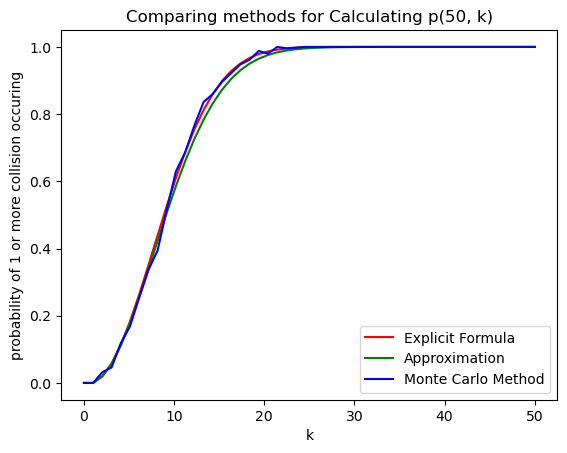

In [82]:
import matplotlib.pyplot as plt, numpy as np, math, random

# n from the formula p(n, k)
n = 50

# amount of samples the monte carlo method performs
samples = 500



# Evaluates p(n, k) using the explicit formula as above
def explicit_formula(n : int, k : int) -> float:
    val = 1
    for i in range(1, k):
        val *= 1 - i/n
    return 1 - val



# Evaluates p(n, k) using the approximation formula as above
def approximation(n : int, k : int) -> float:
    return 1 - math.e**(-k*(k-1)/(2*n))



# Evaluates p(n, k) using the monte carlo method as above
def monte_carlo_method(n : int, k : int, sample_ct : int) -> float:
    mean = 0
    for _ in range(sample_ct):
        # Generate K random integers, and sort for easy comparision
        birthdays = [random.randint(1, n) for _ in range(k)]
        birthdays.sort()
        # If collision occurs, count collision and sample again
        for i in range(k-1):
            if birthdays[i] == birthdays[i+1]:
                mean += 1
                break
    # Return Probability of Collision
    return mean/sample_ct



if __name__ == "__main__":
    # Generate Data
    x = np.linspace(start=0, stop=n, num=n)
    plt.plot(x, [explicit_formula(n+1, i) for i in range(n)], color="red", label="Explicit Formula")
    plt.plot(x, [approximation(n+1, i) for i in range(n)], color="green", label="Approximation")
    plt.plot(x, [monte_carlo_method(n+1, i, samples) for i in range(n)], color="blue", label="Monte Carlo Method")
    
    # Setup Plot
    plt.xlabel("k")
    plt.ylabel("probability of 1 or more collision occuring")
    plt.title("Comparing methods for Calculating p(" + str(n) + ", k)")
    plt.legend(loc="lower right")
    plt.show()

-----
<a name="primality_testing"></a>
# <center>Primality Testing</center> 

Let $\pi(n) = |\{k \in \mathbb N\ |\ \text{ k is prime and } k \leq n \}|$ be the prime counting function. We will discuss multiple techniques we can use to go about evaluating this function.

###### Sieve of Eratosthenes

The Sieve of Eratosthenes determines exactly $\pi(n)$. It is a brute force technique of calculating the first $n$ primes by literally going through and marking every number which is composite. This will be the base line for evaluating $\pi(n)$ below. We also can use this to evaluate $\pi(n)$ since we are using relatively small values of $n$. 

###### Approximation

The Prime Number Theorem states that $\pi(n) \approx \frac{n}{\log(n)}$. So we will use this approximation.

###### 6n $\pm$ 1 Primality Test

This will be the first probabilistic algorithm we will discuss for primality testing. This test starts by observing that 
<center> if $n \equiv 0 \text{ mod } 6$ then $n = 6k + 0$ so $6\ |\ n$ </center>
<center> if $n \equiv 2 \text{ mod } 6$ then $n = 6k + 2$ so $2\ |\ n$ </center>
<center> if $n \equiv 3 \text{ mod } 6$ then $n = 6k + 3$ so $3\ |\ n$ </center>
<center> if $n \equiv 4 \text{ mod } 6$ then $n = 6k + 4$ so $2\ |\ n$ </center>
Which implies, if $n \not \equiv \pm 1 \text{ mod } 6$ then $n$ is composite. The reason why this test is probabilistic, is it assumes the converse, if $n \equiv \pm 1 \text{ mod } 6$ then $n$ is prime, which is not necessarily true. And looking at the results below, we can see that this algorithm is definitely more prime-biased then it should be. It over counts primes more than any of the other algorithms.

###### Fermat Primality Test and Miller-Rabin Primality Test

These two Monte Carlo Methods are put together because they both use the similar principle, if $a^{n-1} \equiv 1 \text{ mod } n$ then $n$ is prime. As usual, the converse of this statement is always true, but the statement itself is only likely to be true. Because this primality test is dependent on the base that was chose, $a$, we can modify these algorithms to test every possible base. Although i don't do this here, doing this happens to turn the Miller-Rabin test into a complete algorithm, because there exist not composite numbers that are psuedoprimes in every base.

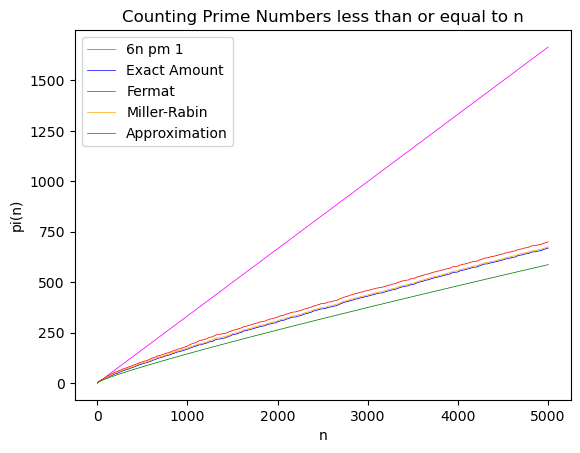

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt



# purpose: overriding built in modular exponentiation. When a^b % n is calcaulted, a^b is 
#          evaluated first, and then its reduced mod n, which causes integer overflow. So here,
#          we impliment it as we did in class.  
# in: integers a, b, and n
# out: a^b mod n
def mod_exp(a : int, b : int, n : int) -> int:
    val = (a ** (b & 1)) % n
    bit = 1
    x = (a**2) % n
    while((1 << bit) <= b):
        if b & (1 << bit) != 0:
            val = (val * x) % n
        bit += 1
        x = (x ** 2) % n
    return val

    

# purpose: evaluate pi(n), prime counting function, using sieve of eratosthenes
def eratosthenes(n : int) -> list:
    is_prime = [1] * (n+1)

    for i in range(2, n+1):
        if is_prime[i] == 1:
            for j in range(2, int(n/i)+1):
                is_prime[i*j] = 0
        
    results = []
    for i in range(2, n+1):
        if is_prime[i]:
            results.append(i)
        
    return results



# purpose: evaluate pi(n), prime counting function, using prime # thm approximation
def approximation(n : int) -> int:
    if n <= 1:
        return 0
    return int(n/math.log(n))



# in: n, to determine if its prime or not
# out: 0 if n is definitely composite, 1 if n likely prime
def six_n_pm_1(n : int) -> int:
    x = n % 6
    return int(x == 1 or x == 5)



# in: base a to check primality in and integer n to test primalitity
# out: 0 if n is definitely composite, 1 if n is likely prime
def fermat(a : int, n : int) -> int:
    return int(mod_exp(a, n-1, n) == 1)



# in: base a to check primality in and integer n to test primalitity
# out: 0 if n is definitely composite, 1 if n is likely prime
def miller_rabin(a : int, n : int) -> int:
    # n needs to be an odd integer
    if n%2 == 0 or n <= 1:
        return 0
    
    # Find n-1 = 2^k * m
    m = n-1
    k = 0
    while m % 2 == 0:
        m = int(m / 2)
        k += 1
    
    # Evalute b = a^m % n
    b = mod_exp(a, m, n)
    i = 0
    if b == 1 or b == n-1:
        return 1
    # Repeatedly square b
    while(i <= k-2):
        b = mod_exp(b, 2, n)
        i += 1
        if b == 1:
            return 0
        if b == n-1:
            return 1
    if b != n-1:
        return 0



if __name__ == "__main__": 
    # We evalute pi(n) from 0 to upper_bound-1
    upper_bound = 5001

    # Evaluate pi(n) using sieve of eratosthenes
    eratosthenes = eratosthenes(upper_bound)
    erato_pi = [0] * (upper_bound)
    for i in range(upper_bound-1):
        erato_pi[i+1] = erato_pi[i] + int(i+1 in eratosthenes)
    
    # Evalute pi(n) using 6n +- 1, fermat, and miller
    fermat_pi = [0] * upper_bound 
    miller_pi = [0] * upper_bound 
    six_n_pi = [0] * upper_bound  
    for i in range(1, upper_bound-1):
        # Get random number for base in fermat / miller
        base = random.randint(2, i+1)
        # Increment if primality test returns prime
        fermat_pi[i+1] = fermat_pi[i] + int(fermat(base, i+1) == 1)
        miller_pi[i+1] = miller_pi[i] + int(miller_rabin(base, i+1) == 1)
        six_n_pi[i+1]  = six_n_pi[i]  + int(six_n_pm_1(i+1) == 1)
    
    # Plotting with matplotlib
    width = .5
    x = np.linspace(start=0, stop=upper_bound, num=upper_bound)    
    # COMMENT OUT SIX_N_PI LINE TO GET MORE DETAILED PLOT OF OTHERS. SINCE IT OVER COUNTS ALOT
    plt.plot(x, six_n_pi, color="magenta", label="6n pm 1", linewidth=width)
    plt.plot(x, erato_pi, color="blue", label="Exact Amount", linewidth=width)
    plt.plot(x, fermat_pi, color="red", label="Fermat", linewidth=width)
    plt.plot(x, miller_pi, color="orange", label="Miller-Rabin", linewidth=width)
    plt.plot(x, [approximation(n) for n in range(upper_bound)], 
             color="green", label="Approximation", linewidth=width)
    plt.xlabel("n")
    plt.ylabel("pi(n)")
    plt.title("Counting Prime Numbers less than or equal to n")
    plt.legend(loc="upper left")
    plt.show()

-----
<a name="vigenère_cipher"></a>
# <center>Vigenère Cipher</center> 

The shift cipher is a simple cipher defined by $x \mapsto x+c \text{ mod } n$ where $n$ is the size of the character set and $c$ is some fixed constant. This is one of the most simple ciphers. But because there are only $n$ possible shift ciphers, it is trivial to break using computers. The vigenère cipher generalizes this by introducing a key, say $\{k_1, k_2, \ldots, k_l\}$. The vigenère cipher is a modifier shift which given the character $x$ and its index in the plain text $i$, performs the calculation $x \mapsto x + k_{i \text{ mod } l} \text{ mod } n$. In other words, it shifts each character, where each consecutive shift shifts the character in the plaintext by the next character in the key. 

The attack on the vigenère cipher, implemented here, is a probabilistic algorithm. Its an information theoretic attack where we utilize the fact that the frequency of characters in plaintext follows the non-uniform frequency of the characters in the english language, while the frequency of characters in ciphertext tends to be random.

In [8]:
# Use to get frequency of english language
english_sample = "Tolstoy said that the best Russian literature does not conform to standards and hence hesitated to classify War and Peace, saying it is \"not a novel, even less is it a poem, and still less a historical chronicle\". Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. Enter the terrifying world of Tunnels-a subterranean society under the streets of modern London, whose citizens are enslaved by a strange, cruel sect, the Styx, who plan to exterminate all Topsoilers. Can fourteen-year-old Will defeat the Styx, and rescue his missing father? Roderick Gordon and Brian Williams first met at college in London and have remained friends ever since. Gordon, a former investment banker, now lives with his wife and children in Norfolk, England; Williams, an installation artist, inhabits the city's Hackney neighborhood, accompanied everywhere by his invisible dog. About their writing process, Gordon says: When I lived in London, my house was only a ten-minute bike ride from where Brian lived, so he'd cycle round and we would work on Tunnels at my kitchen table. When I moved with my family to the country, we discussed Deeper over many late-night phone calls, and swapped sections by email. When I visit London we go to a couple of favorite cafes.  They've gotten used to us and know that we can make a cup of coffee last several hours! He's a loner at school, his sister's beyond bossy, and his mother watches TV all day long, but at least Will Burrows shares one hobby with his otherwise weird father: They're both obsessed with archeological sites. When the two discover an abandoned tunnel buried below modern London, they think they're on the brink of a major find. Then Dad disappears. And strange men start following Will home. Helped by his only friend, Chester, Will decides to investigate. Soon the boys are lost in a dark underworld, desperate to escape the clutches of a cruel and brutal cult. The deeper they descend, the deadlier it gets!"

# Alphabet / Character Set. Used to convert character <-> integer
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890 ,.!?\'\"-;:"

# Text to Encrypt / Decrypt
plaintext = "There are a lot of characters which we take the frequency into consideration, so its important that we have enough plain text, to get information to decipher it when encrypted. Its very mysterious to why the code doesn't work, maybe its just because im bad."

# Key to Encrypt plaintext
key = "KEYkey836,.;"



# Reads in string, gets frequency of ascii characters in terms of global alphabet
def frequency(sample : str) -> list:
    global alphabet
    freq = [0] * len(alphabet)
    count = 0
    for char in sample:
        freq[alphabet.index(char)] += 1 
        count += 1
    for i in range(len(alphabet)):
        freq[i] /= count
    return freq
   


# Dot Product of two frequency lists
def dot(x : list, y : list, y_shift : int) -> float:
    global alphabet
    if len(x) != len(y) or not isinstance(x, list) or not isinstance(y, list):
        raise Exception("dot product only defined for lists of same length")
    rv = 0
    for i in range(len(x)):
        rv += x[i] * y[(i-y_shift)%len(alphabet)]
    return rv



# Encrypt Plaintext Using Key
def encrypt(plaintext : str, key : str) -> str:
    global alphabet
    ciphertext = ""
    for i in range(len(plaintext)):
        ind = alphabet.index(plaintext[i]) + alphabet.index(key[i % len(key)])
        ciphertext += alphabet[ind % len(alphabet)]
    return ciphertext



# Decrypt Ciphertext Using Key
def decrypt(ciphertext : str, key : str) -> str:
    global alphabet
    plaintext = ""
    for i in range(len(ciphertext)):
        ind = alphabet.index(ciphertext[i]) - alphabet.index(key[i % len(key)])
        plaintext += alphabet[ind % len(alphabet)]
    return plaintext



# Get vector of key guesses (one guess for each key length)
def key_guess(ciphertext : str) -> str:
    global english_sample, alphabet
    
    # RANK KEY OPTIONS BASED ON KEY SIZE
    
    # Constans for max and min length of key length
    max_key_length = int( len(ciphertext)/2 )
    min_key_length = 4
    
    # Count Matches for Each Key Length
    match_ct = [0] * max_key_length # store match count of shift lengths 1 to max_key_length
    total_match_ct = 0 # normalize match count so we can score the keys at the end
    
    # for each possible key length
    for i in range(min_key_length, max_key_length):
        # for each shift
        for j in range( max_key_length-(i+1) ):
            # count collosions / matches that occur
            if ciphertext[j] == ciphertext[j+(i+1)]:
                match_ct[i] += 1
                total_match_ct += 1
    
    
    # Sort Key Lengths based on amount of matches
    min_match_ct = int(max(match_ct)*2/3) # only look at keu lengths with enough matches
    
    match_sorted = []
    Max = max(match_ct)
    while Max >= min_match_ct:
        for i in range(min_key_length, max_key_length):
            if match_ct[i] == Max:
                match_sorted.append(i+1)
                match_ct[i] = -1
        Max = max(match_ct)

       
    # GIVEN KEY SIZES, GENERATE BEST KEY FOR EACH SIZE
    
    F = frequency(english_sample)
    results = []
    # for each key length that had enough matches found above
    for key_length in match_sorted:
        this_key = ""
        this_score = 0
        # for each position in the given key
        for key_ind in range(key_length):
            this_freq = frequency(ciphertext[key_ind::key_length])
            best_char = ""
            best_score = 0.0
            # fill position with character such that dot product of freqency of potential
            # plain text and frequency of sample english is maximum
            for i in range(len(alphabet)):
                result = dot(this_freq, F, i)
                if best_score < result:
                    best_score = result
                    best_char = alphabet[i]
            this_key += best_char
            this_score += best_score
            
        # Fine Tune Total Score so we can properly guess the key
        x = 0
        for i in match_sorted:
            if i % key_length == 0:
                x += 1
        total_score = this_score/key_length + match_ct[key_length]/total_match_ct + x/20 + .1/(5+key_length)
        results.append((this_key, total_score))
    
    # OUTPUT RESULTS
    results = sorted(results, key=lambda t: t[1], reverse=True)
    
    print("Results are: ")
    for r in results:
        print( f"{len(r[0]):<2}", f"{r[1]:.4f}", r[0])
    print
    
    return results[0][0]




if __name__ == "__main__":
    ciphertext = encrypt( plaintext, key )
    best_guess = key_guess( ciphertext )
    decrypt = decrypt( ciphertext, best_guess )
    
    print("\n\nOriginal Key:\t", key, "\nGuessed Key:\t", best_guess)
    if key == best_guess:
        print("\n\nSUCCESS: KEY WAS GUESSED ACCURATELY\n\n\nPlaintext: ", plaintext, "\n\nCiphertext: ", ciphertext)
    else:
        print("\n\nPlaintext: ", plaintext, "\n\nCiphertext: ", ciphertext, "\n\nDecrypted Ciphertext: ", decrypt)

Results are: 
12 0.3336 KEYkey836,.;
24 0.2740 KE.key836,.;KEYkey836,.;
48 0.1995 ZE.key8?:,k;KEYkgB8"6,tiW8.Hey856Jv;KEYkoyq36u.;
96 0.1454 tO.key83:ic;K2.kqN8?6bk;K8.Ley8:d,.;UEYkeQb36kk;ZE0yqy8?d,kuKEYweVe";,giWWcHfya56jvAKW.JCyj.iu.z
72 0.1352 .E.keybj6..;KE0keQq"i,.iWE0kqy8:6J.;KSYxgy83nig;K6.Kez83j,i;!EYkqWa76eki


Original Key:	 KEYkey836,.; 
Guessed Key:	 KEYkey836,.;


SUCCESS: KEY WAS GUESSED ACCURATELY


Plaintext:  There are a lot of characters which we take the frequency into consideration, so its important that we have enough plain text, to get information to decipher it when encrypted. Its very mysterious to why the code doesn't work, maybe its just because im bad. 

Ciphertext:  jL3Bio8:02.9VS-asDX5.,j;MX3Bwoj0!!:97IODeI,Se;"9PV3AyCa5j2al4SOmsLf 9'j;4M.x'of"V:lqAM zsPg3;k3rRE-aACX06m"9OR.EkFX-",alAX3HxpXb:2;c4u7xjMe?6kamXu-y?B,5!g:c2u7D?U?7;2"lMVczxC UVzlqAZ3BCo:gdk"pSS;C?RbSh;q94L3agM 7V?gc3RTD?Ub:'33kK3Zo?GgaVamq4uZogyha02akAFYn"


The results tends to be a little finicky. The way we evaluate scores tends to work, but its possible for it to not return the key with the correct key length. It also tends to get the right key size but incorrect key when the size of the key approaches the size of the ciphertext. But in general it works, so thats fine for me!

-----
<a name="png"></a>
# <center>Random Number Generation</center> 

Being able to generate numbers uniformly at random is essential for cryptography. Whether it be for generating keys, adding salt to a hash, or inputing random bits into a cipher to avoid chosen plaintext attacks, being able to generate truly random data is important. 

### Pseudorandom Number Generators

The most "canonical" way of obtain random numbers if via a Pseudorandom Number Generator. The standard Pseudorandom Number Generator is a deterministic algorithm, which produces numbers "at random". A proper Pseudorandom Number Generator would return numbers over a uniform probability distribution, while actually returning random numbers. 

But there are plenty of issues with these. They tend to be periodic, meaning they clearly don't represent truly random behavior. They are deterministic, so assuming you know the seed given to the number generator, you can completely predict the numbers that it will return. So although they tend to output random numbers, for many contexts its essential that they actually give truly random numbers that aren't periodic, don't have patterns, and aren't deterministic. 

### True Random Number Generators

Using random noise from outside of software is one way of generating random numbers. Because natural phenomenon are much more effective ways of producing the truly random numbers we need for essential cryptographic processes, we can use environmental noise for our Random Number Generators. But how do we get access to random noise? We can record the noise as bits and simply access sequential bits, to obtain our random numbers. Or we can utilize specified hardware which samples some random phenomenon in real time.

###### Random Noise Saved Digitally

Recording random noise, and simply reading the data as a Random Number Generator can have issues. We can only record a finite amount of random noise, so reading the data sequentially will result in it being periodic. This can be mitigated by choosing the random data we select via some pseudorandom number generator. We could have issues if the data is obtained by an adversary, because with the data they can completely predict what the random number generator will return. But thats a problem for Cybersecurity Experts.

###### Random Noise Sampled in Real Time

Sampling the random data in real time also has issues. This is mainly because the sampling is much more time intensive. So if we need alot of random data, it will take alot longer than the other techniques. But this is a problem for Computer Engineering Experts.

0


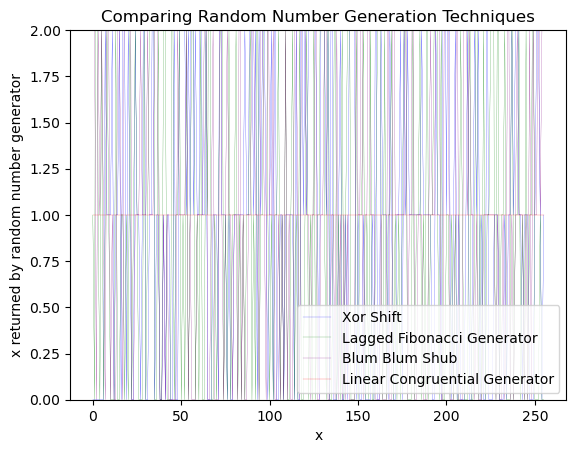

In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt



class linear_congruential():
    def __init__(self, seed=0, bits=16):
        self.m = 2**bits
        self.c = 3
        self.a = 5
        
        if seed == 0:
            seed = int(time.time())
        self.state = ( int(seed/2)*2+1 ) % self.m

    def __call__(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state



class xor_shift():
    def __init__(self, seed = 0, bits = 16):
        if seed == 0:
            self.start = 1
        else:
            self.start = int(time.time()) % (2**(bits))
        self.state = self.start
        self.size = 2**bits
        
        x = {
             8 : (4,  7,  5 ), 
             16: (7,  9,  13),
             32: (13, 17, 5 )
            }
        
        if not bits in x.keys():
            raise Exception(
                "xor shift class needs values hardcoded for certain bit inputs, this included.")
        self.triple = x[bits]
        
        
    def __call__(self):
        x = self.state
        x ^= (x >> self.triple[0])
        x ^= (x << self.triple[1])
        x ^= (x >> self.triple[2])
        self.state = x
        return x % self.size


    
class lagged_fibonacci():
    def __init__(self, seed = 0, bits = 16):
        self.j = 1
        self.k = 2
        self.n = max(self.j, self.k)
        self.m = 2**bits
        
        self.state = [1, 1] 
         
        for i in range(2, self.m):
            x = (self.state[i-1] + self.state[i-2]) % self.m
            self.state.append(x)
        
    def __call__(self):
        x = (self.state[self.n - self.j] + self.state[self.n - self.k]) % self.m
        self.state.append(x)
        self.state.pop(0)
        return x


    
class blum_blum_shub():
    def __init__(self, seed = 0, bits = 16):
        self.M = 200560490131 * 263130836933693530167218012159999999
        self.size = 2**bits
        self.state = max(seed, 2) % self.M
        
    def __call__(self):
        self.state *= self.state
        self.state %= self.M
        return self.state % self.size

    
    
if __name__ == "__main__":    
    bit_count = 8 #FYI it slows down alot when bit_count is 16 or larger
    thick = .15
    # seed random number generators
    lcg = linear_congruential(bits=bit_count)
    xor = xor_shift(bits=bit_count)
    lfg = lagged_fibonacci(bits=bit_count)
    bbs = blum_blum_shub(bits=bit_count)

    # evaluate random number generators
    samples = 2**bit_count
    result = { "lcg" : [0] * samples,
               "xor" : [0] * samples,
               "lfg" : [0] * samples, 
               "bbs" : [0] * samples,
              }
    for i in range(samples):
        if i % 5000 == 0: # It can be slow, so i put message to let you know if its working or not
            print(i)
        result["lcg"][lcg()] += 1
        result["xor"][xor()] += 1
        result["lfg"][lfg()] += 1        
        result["bbs"][bbs()] += 1

    
    plt.plot(result["xor"], color="blue", label="Xor Shift", linewidth=thick)
    plt.plot(result["lfg"], color="green", label="Lagged Fibonacci Generator", linewidth=thick)
    plt.plot(result["bbs"], color="purple", label="Blum Blum Shub", linewidth=thick)
    plt.plot(result["lcg"], color="red", label="Linear Congruential Generator", linewidth=thick)

    plt.xlabel("x")
    plt.ylabel("x returned by random number generator")
    plt.title("Comparing Random Number Generation Techniques")
    plt.legend(loc="lower right")
    plt.ylim(ymin=0, ymax=2 * samples/(2**bit_count))
    plt.show()
    

The random number generators are implemented to return values between $0$ and $2^{bits}$. Because we need the functions to keep an internal counter, which we give to the actual pseudorandom number generator, and we need to seed the functions themselves, implementing them as classes works most effectively in python.

Also, i think i could choose a method for better data visualization here. Its hard to tell that the only one which is just "one" is the Linear Congruential Generator. I could also delve into the techniques used to verify that they are not periodic, and give for all intents and purposes, actual random numbers. But i leave this for future me, since this topic deserves a lot more space to discuss and implement then the space i gave it.